In [1]:
# import necessary libraries

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import seaborn as sb
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_dca325d5337e44d584437193da8bd014 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='pp6siK9QcYaoUKawPHs_A_M1Enja-Le3jwxbv2bYo595',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_dca325d5337e44d584437193da8bd014.get_object(Bucket='projectii-donotdelete-pr-56dceagoknc0xx',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

#df = pd.read_csv('Life Expectancy Data.csv')
#df.head()

df = pd.read_csv(body)
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
#We will begin by looking to understand the structure of our dataset, its features, and its data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
'''
Our data appears to be mostly floats and integers. However, status is an object and will need to be changed to a float to
be able to use in regression. Secondly, the data appears to have missing values in most columns this will need to be 
investigated father to understand how to responisbly handle missing and null data. Additionally, the column 'thiness 1-19
years' needs to fixed to 'thiness 10-19 years'

'''

"\nOur data appears to be mostly floats and integers. However, status is an object and will need to be changed to a float to\nbe able to use in regression. Secondly, the data appears to have missing values in most columns this will need to be \ninvestigated father to understand how to responisbly handle missing and null data. Additionally, the column 'thiness 1-19\nyears' needs to fixed to 'thiness 10-19 years'\n\n"

In [5]:
#We will use a labelencoder to change "status" top a 1 (Developing) and 0 (Developed)
  
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df.Status.unique()) 
df['Status']=label_encoder.transform(df['Status'])

df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
#Check to make sure data was changed to 1 and 0
print(len(df['Status'].unique()))

2


In [7]:
#Remove irreularites in Spacing and Capitilzation
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [8]:
#Streamline Spacing and Capitalization amongst column titles 

#Remove Leading spaces
df.columns =  [names.lstrip() for names in df.columns]

#Remove Trailing spaces 
df.columns =  [names.rstrip() for names in df.columns]

#Capliatize column name

df.columns = [names.capitalize() for names in df.columns]


In [9]:
#View adjusted Names
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis b',
       'Measles', 'Bmi', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'Hiv/aids', 'Gdp', 'Population', 'Thinness  1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [10]:
#Fix typo
df.rename(columns={'Thinness  1-19 years':'Thinness 10-19 years'}, inplace=True)

In [11]:
'''
The irregularities were removed from the column names. This will help us when referencing to columns later. This will also
make the visulization axis titles appear as they should. We will now handle data quality issues.
'''

'\nThe irregularities were removed from the column names. This will help us when referencing to columns later. This will also\nmake the visulization axis titles appear as they should. We will now handle data quality issues.\n'

In [12]:
#Look at Null Values to examine data quality
df.isnull().sum().sort_values(ascending=False)

Population                         652
Hepatitis b                        553
Gdp                                448
Total expenditure                  226
Alcohol                            194
Income composition of resources    167
Schooling                          163
Bmi                                 34
Thinness 10-19 years                34
Thinness 5-9 years                  34
Diphtheria                          19
Polio                               19
Adult mortality                     10
Life expectancy                     10
Under-five deaths                    0
Hiv/aids                             0
Measles                              0
Percentage expenditure               0
Infant deaths                        0
Status                               0
Year                                 0
Country                              0
dtype: int64

In [13]:
'''
There are clear problems with null values in the data set. We will looks at the data and identify issues that need to be
addressed before analysis.
'''

'\nThere are clear problems with null values in the data set. We will looks at the data and identify issues that need to be\naddressed before analysis.\n'

In [14]:
#Look at data to indentify irregularities 
df.describe()

,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis b,Measles,Bmi,...,Polio,Total expenditure,Diphtheria,Hiv/aids,Gdp,Population,Thinness 10-19 years,Thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,...,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,0.825732,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,...,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,0.379405,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,...,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,0.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,...,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,1.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,...,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,1.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,...,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,1.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,...,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,1.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,...,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [15]:
'''
The table above gives us good insight to irregulatities in the dataset. Three identified issues that should be adressed are as 
follows:

BMI has a Min of 1 and a Max of 87. Niether of these values make sense and should be adjusted. BMI can realisticlly be
between 10-50

Infant deaths min = 0, that is not possible. Each country has some degree of Infant death. We should adjust accordingly.

Under-five deaths has a value of 0 as min. Similar to infant death, this is not possible.
'''

'\nThe table above gives us good insight to irregulatities in the dataset. Three identified issues that should be adressed are as \nfollows:\n\nBMI has a Min of 1 and a Max of 87. Niether of these values make sense and should be adjusted. BMI can realisticlly be\nbetween 10-50\n\nInfant deaths min = 0, that is not possible. Each country has some degree of Infant death. We should adjust accordingly.\n\nUnder-five deaths has a value of 0 as min. Similar to infant death, this is not possible.\n'

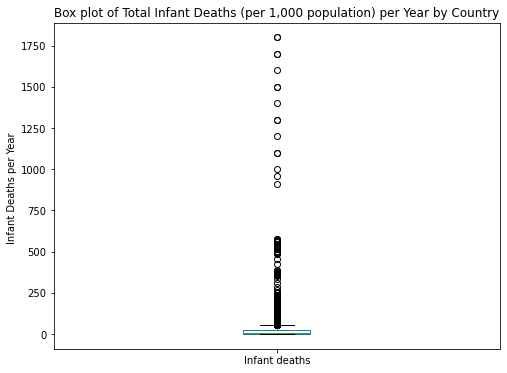

In [16]:
df['Infant deaths'].plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Total Infant Deaths (per 1,000 population) per Year by Country')
plt.ylabel('Infant Deaths per Year ')

plt.show()

In [17]:
'''
We find that there is a signifigant amount of instances were infant death =0. We should 
remove or adjust these instances. We also see a few outliers where there are +1,000 infant 
deaths per 1,000 people. This seems missleading and to be a data error. This should be handled 
in outlier detection.
'''

'\nWe find that there is a signifigant amount of instances were infant death =0. We should \nremove or adjust these instances. We also see a few outliers where there are +1,000 infant \ndeaths per 1,000 people. This seems missleading and to be a data error. This should be handled \nin outlier detection.\n'

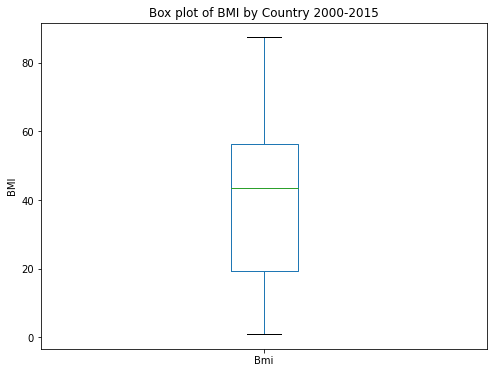

In [18]:
df['Bmi'].plot(kind='box', figsize=(8, 6))

plt.title('Box plot of BMI by Country 2000-2015')
plt.ylabel('BMI')

plt.show()

In [19]:
'''
This boxplot confirms our hypothesis about the BMI spread. According to the cdc 
(https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html) any BMI >30 is considered
obese. The mean BMI is +40, with a signifigant amout of values +50. This leads me to believe
the BMI column on this dataset is inaccurate.
'''

'\nThis boxplot confirms our hypothesis about the BMI spread. According to the cdc \n(https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html) any BMI >30 is considered\nobese. The mean BMI is +40, with a signifigant amout of values +50. This leads me to believe\nthe BMI column on this dataset is inaccurate.\n'

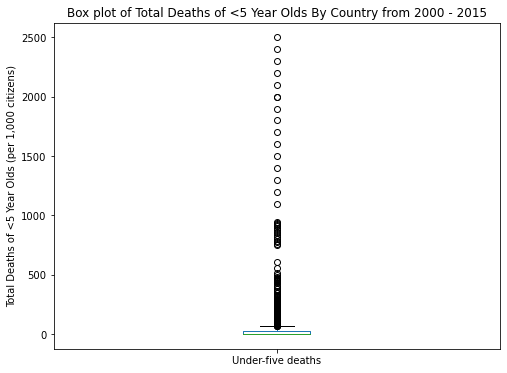

In [20]:
df['Under-five deaths'].plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Total Deaths of <5 Year Olds By Country from 2000 - 2015')
plt.ylabel('Total Deaths of <5 Year Olds (per 1,000 citizens)')

plt.show()

In [21]:
'''
We find that there is a signifigant amount of instances were 'Under-five' deaths =0. We should 
remove or adjust these instances. We also see data point +1000 deaths per 1,000 people, which
also does not seem possible.
'''

"\nWe find that there is a signifigant amount of instances were 'Under-five' deaths =0. We should \nremove or adjust these instances. We also see data point +1000 deaths per 1,000 people, which\nalso does not seem possible.\n"

In [22]:
#We will begin by adjusting the problems identified above:

#Remove the invalid BMI: all BMI that is not between 10 and 50 will be entered in as null
df["Bmi"] =df.apply(lambda x : np.nan if (x["Bmi"] <10 or x["Bmi"] >50) else x["Bmi"],axis =1)

#Remove Infant deaths of 0: all instances where infant deaths = 0 are replaced as nan
df["Infant deaths"] = df["Infant deaths"].replace(0,np.nan)

#Remove Under five deaths: all instances where under-five deaths = 0 are replaced as nan
df["Under-five deaths"] =df["Under-five deaths"].replace(0,np.nan)

In [23]:
#We will review null values to see null value counts after adjustments.
df.isnull().sum().sort_values(ascending=False)

Bmi                                1456
Infant deaths                       848
Under-five deaths                   785
Population                          652
Hepatitis b                         553
Gdp                                 448
Total expenditure                   226
Alcohol                             194
Income composition of resources     167
Schooling                           163
Thinness 10-19 years                 34
Thinness 5-9 years                   34
Polio                                19
Diphtheria                           19
Adult mortality                      10
Life expectancy                      10
Measles                               0
Hiv/aids                              0
Percentage expenditure                0
Status                                0
Year                                  0
Country                               0
dtype: int64

In [24]:
'''
After looking at our null values after adressing data quality issues, we now have BMI with 1456 null values. We will remove the
column Bmi due to data quality issues.
'''

'\nAfter looking at our null values after adressing data quality issues, we now have BMI with 1456 null values. We will remove the\ncolumn Bmi due to data quality issues.\n'

In [25]:
#Remove BMI do to total of missing values
df.drop(columns='Bmi', inplace=True)



In [26]:
df.isnull().sum().sort_values(ascending=False)

Infant deaths                      848
Under-five deaths                  785
Population                         652
Hepatitis b                        553
Gdp                                448
Total expenditure                  226
Alcohol                            194
Income composition of resources    167
Schooling                          163
Thinness 10-19 years                34
Thinness 5-9 years                  34
Polio                               19
Diphtheria                          19
Adult mortality                     10
Life expectancy                     10
Measles                              0
Hiv/aids                             0
Percentage expenditure               0
Status                               0
Year                                 0
Country                              0
dtype: int64

In [27]:
'''
For the rest of our null values we will take the mean values of each country over the 15 years and replace the null values with 
the averages.

'''

'\nFor the rest of our null values we will take the mean values of each country over the 15 years and replace the null values with \nthe averages.\n\n'

In [28]:
#We will take the mean of an attibute by country and replace null values to remove all nulls

data = []

for year in list(df.Year.unique()):
    year_data = df[df.Year == year].copy()
    
    for col in list(year_data.columns)[3:]:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().mean()).copy()

    data.append(year_data)
df = pd.concat(data).copy()

In [29]:
df.isnull().sum().sort_values(ascending=False)

Schooling                          0
Measles                            0
Year                               0
Status                             0
Life expectancy                    0
Adult mortality                    0
Infant deaths                      0
Alcohol                            0
Percentage expenditure             0
Hepatitis b                        0
Under-five deaths                  0
Income composition of resources    0
Polio                              0
Total expenditure                  0
Diphtheria                         0
Hiv/aids                           0
Gdp                                0
Population                         0
Thinness 10-19 years               0
Thinness 5-9 years                 0
Country                            0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   int64  
 3   Life expectancy                  2938 non-null   float64
 4   Adult mortality                  2938 non-null   float64
 5   Infant deaths                    2938 non-null   float64
 6   Alcohol                          2938 non-null   float64
 7   Percentage expenditure           2938 non-null   float64
 8   Hepatitis b                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  Under-five deaths                2938 non-null   float64
 11  Polio                            2938 non-null   float64
 12  Total expenditure   

In [31]:
#Now that the data has no null values we will begin removing outliers

#first we must remove the country label as it is not a 
df_o=df.drop('Country', axis=1)




In [32]:
df_o.head()

,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis b,Measles,Under-five deaths,Polio,Total expenditure,Diphtheria,Hiv/aids,Gdp,Population,Thinness 10-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,2015,1,65.0,263.0,62.000000,0.010000,71.279624,65.0,1154,83.000000,6.0,8.16,65.0,0.1,584.259210,3.373649e+07,17.2,17.3,0.479,10.1
16,2015,1,77.8,74.0,35.129032,4.600000,364.975229,99.0,0,44.844961,99.0,6.00,99.0,0.1,3954.227830,2.887300e+04,1.2,1.3,0.762,14.2
32,2015,1,75.6,19.0,21.000000,5.288333,0.000000,95.0,63,24.000000,95.0,7.08,95.0,0.1,4132.762920,3.987153e+07,6.0,5.8,0.743,14.4
48,2015,1,52.4,335.0,66.000000,5.288333,0.000000,64.0,118,98.000000,7.0,7.08,64.0,1.9,3695.793748,2.785935e+06,8.3,8.2,0.531,11.4
64,2015,1,76.4,13.0,35.129032,5.288333,0.000000,99.0,0,44.844961,86.0,7.08,99.0,0.2,13566.954100,1.109741e+07,3.3,3.3,0.784,13.9


In [33]:


from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_o))
print(z)

[[1.6217623  0.45939851 0.44513423 ... 2.7732848  0.72467319 0.57934834]
 [1.6217623  0.45939851 0.90127845 ... 0.79651845 0.65462571 0.67517745]
 [1.6217623  0.45939851 0.66986377 ... 0.20748872 0.56202261 0.73637383]
 ...
 [1.62987849 0.45939851 0.12956876 ... 2.05932415 0.93424864 1.3137049 ]
 [1.62987849 0.45939851 2.67513023 ... 0.58678031 1.0219779  0.73233929]
 [1.62987849 0.45939851 2.44371555 ... 1.41229732 0.94399634 0.67114291]]


In [34]:
df_out= df_o[(z < 3).all(axis=1)]

In [35]:
df_o.shape

(2938, 20)

In [36]:
df_out.shape

(2186, 20)

In [37]:
'''
By removing instances where z>3 we found that 752 instances were removed. This left us with
2186 instacnes left to work with. 

Now that the outliers are removed we will look to visulize the data. 
'''

'\nBy removing instances where z>3 we found that 752 instances were removed. This left us with\n2186 instacnes left to work with. \n\nNow that the outliers are removed we will look to visulize the data. \n'

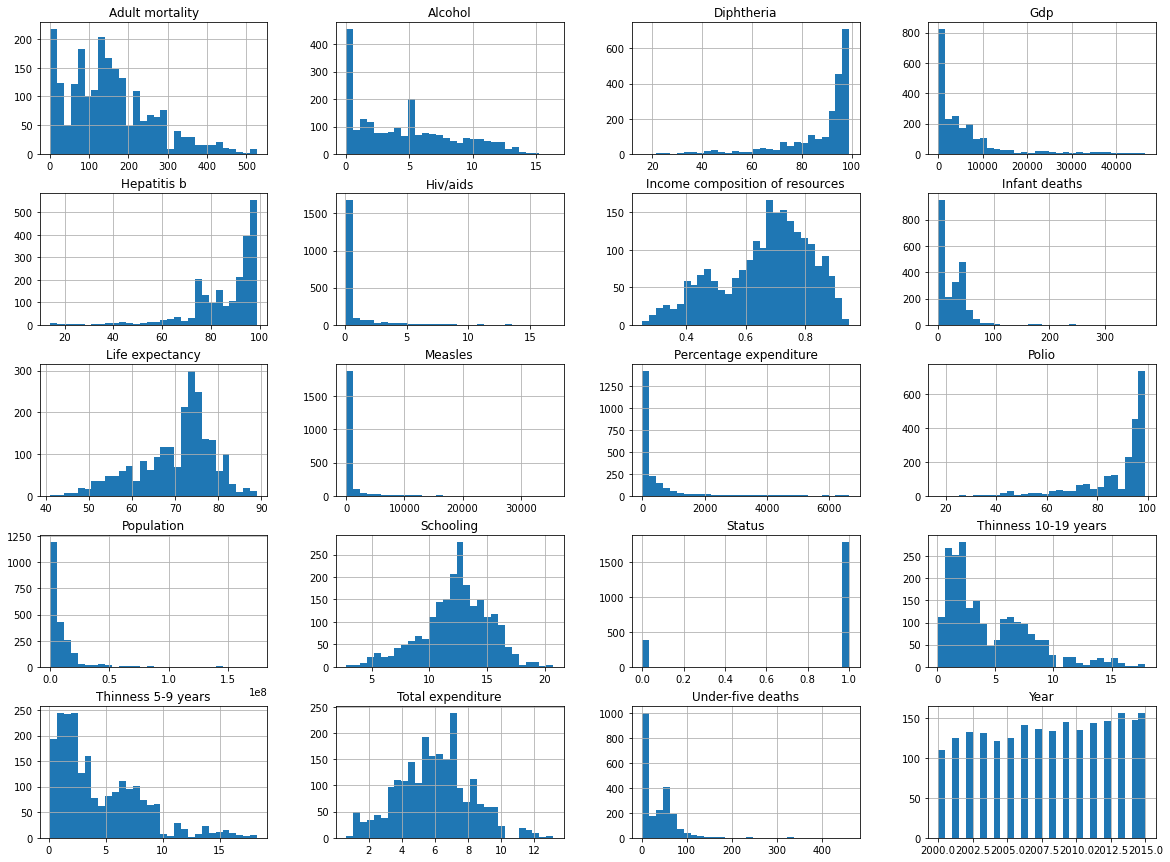

In [38]:
#we will look at the distribution of all our varibles 

df_out.hist(bins=30, figsize=(20,15))
plt.show()

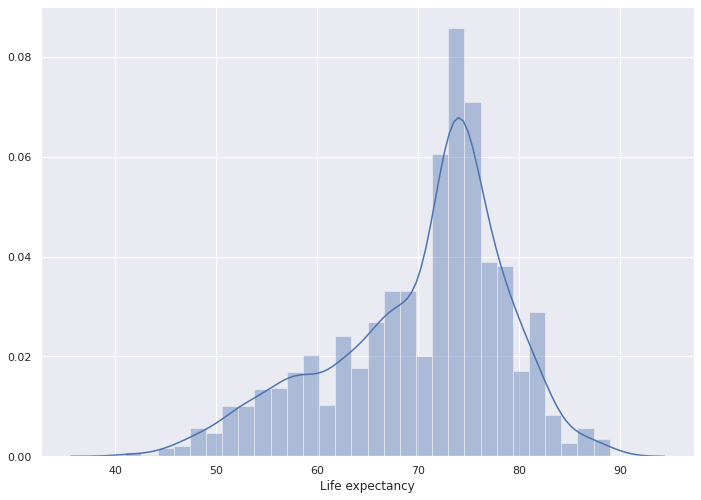

In [39]:
#We will take a closer look at out target varibale 'Life expectancy'

sb.set(rc={'figure.figsize':(11.7,8.27)})
sb.distplot(df_out['Life expectancy'], bins=30)
plt.show()


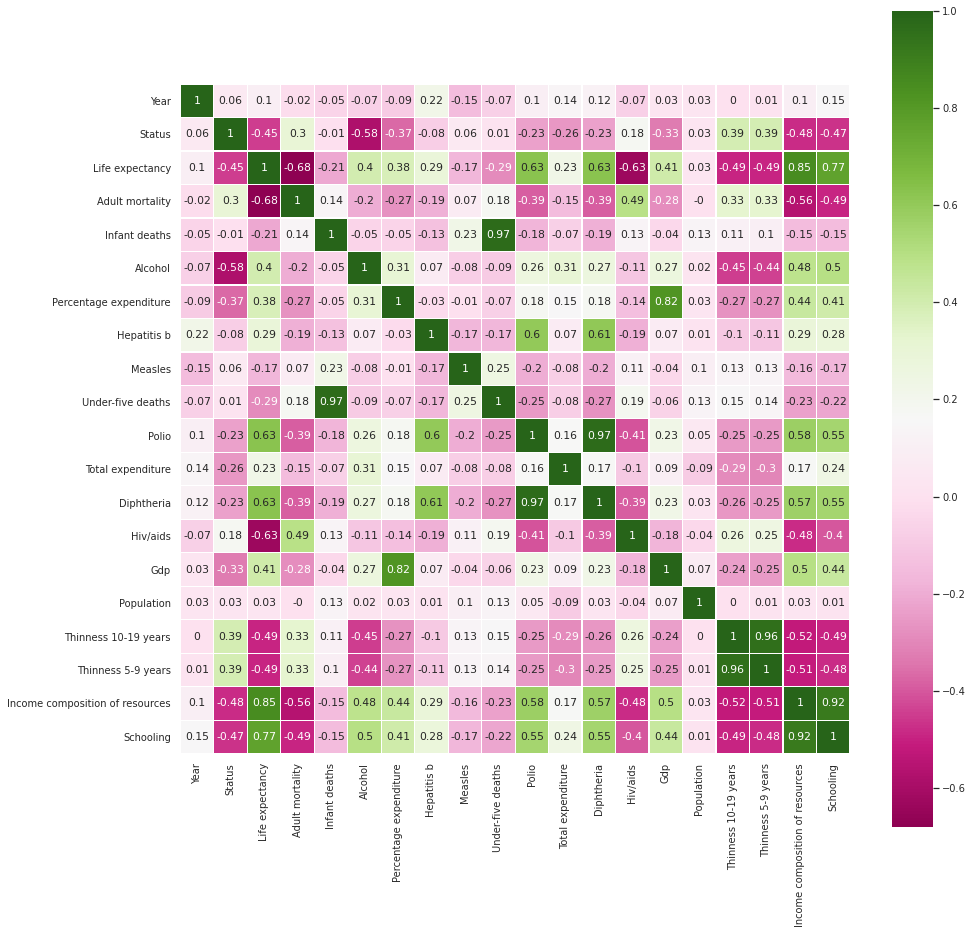

In [40]:
#We will create heatmap to look to correlations between data

correlation_matrix = df_out.corr().round(2)


sb.set(font_scale=.9)
plt.figure(figsize=(15,15))

sb.heatmap(correlation_matrix, 
        cmap="PiYG",
        annot=True,
        square=True,
        linewidths=.25)





In [42]:
#List of Correlation values

features=df_out.corr()['Life expectancy'].sort_values(kind="quicksort",ascending=False)
features

Life expectancy                    1.000000
Income composition of resources    0.854493
Schooling                          0.766968
Polio                              0.632601
Diphtheria                         0.626666
Gdp                                0.412143
Alcohol                            0.396402
Percentage expenditure             0.381893
Hepatitis b                        0.292827
Total expenditure                  0.225705
Year                               0.098033
Population                         0.031122
Measles                           -0.165796
Infant deaths                     -0.212055
Under-five deaths                 -0.288200
Status                            -0.454622
Thinness 5-9 years                -0.488842
Thinness 10-19 years              -0.494304
Hiv/aids                          -0.630951
Adult mortality                   -0.681579
Name: Life expectancy, dtype: float64

In [43]:
'''
It looks like some of the predictor variables have a pretty good correlation with life expectancy. By analyzing this matrix, we can begin to understand
which variables might be the best predictors to utilize within our model. Through analyzing, it seems that schooling, income composition of resources, diphtheria,
polio, adult mortality, and Hiv/aids are the most correlated with life expectancy. These variables could be the best predictors to interpret a given
individuals life expectancy.

'''

'\nComments on Highest absolute correlation values \n'

In [44]:
df_out.columns

Index(['Year', 'Status', 'Life expectancy', 'Adult mortality', 'Infant deaths',
       'Alcohol', 'Percentage expenditure', 'Hepatitis b', 'Measles',
       'Under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'Hiv/aids', 'Gdp', 'Population', 'Thinness 10-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [45]:
#Create Map of Life expectancy 
!pip install folium


     |████████████████████████████████| 94 kB 6.3 MB/s  eta 0:00:01


In [46]:
import folium

In [47]:
# define the world map
# world_map = folium.Map()
# display world map
# world_map

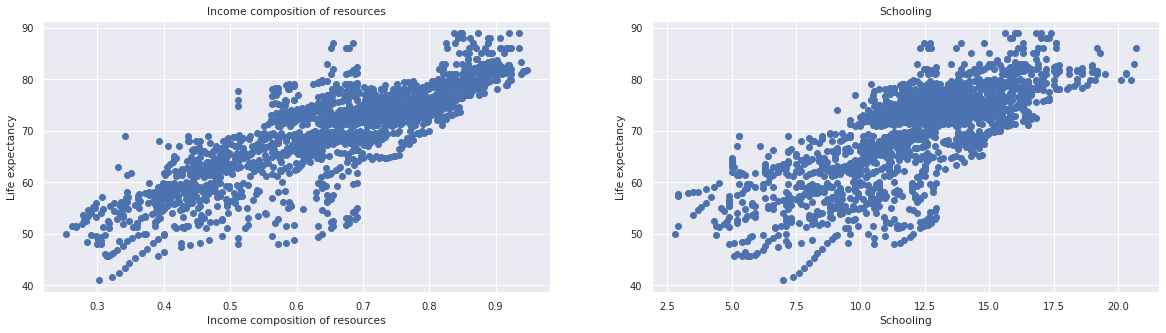

In [48]:
# create list with our highest-correlating variables and set our target to Life expectancy

features = ['Income composition of resources', 'Schooling']
target = df_out['Life expectancy']


# plot the data

plt.figure(figsize=(20, 5))
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df_out[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Life expectancy')

In [49]:
"""
Based on the scatter plots above, we can see that both Income composition of resources and Schooling have a positive and strong correlation to our target, Life expectancy. This makes sense because, 
with Income composition of resources, a country that can utilize its resources well will probably have more citizens that are able to live for a longer time. Also, a proper education can be very 
important to living a healthy lifestyle which would lead to a longer life, which could be why schooling has a strong, positive correlation to Life expectancy. Since the plots are relatively linear, 
we will use multilinear regression to create our model.
"""

'\nBased on the scatter plots above, we can see that both Income composition of resources and Schooling have a positive and strong correlation to our target, Life expectancy. This makes sense because, \nwith Income composition of resources, a country that can utilize its resources well will probably have more citizens that are able to live for a longer time. Also, a proper education can be very \nimportant to living a healthy lifestyle which would lead to a longer life, which could be why schooling has a strong, positive correlation to Life expectancy. Since the plots are relatively linear, \nwe will use multilinear regression to create our model.\n'

In [50]:
# multilinear regression of the above properties
# create new dataframe with our two variables and set var Y to our target

X = pd.DataFrame(np.c_[df_out['Income composition of resources'], df_out['Schooling']], columns = ['Income composition of resources','Schooling'])
Y = df_out['Life expectancy']

# sampling our data; create train and test sets for both our target and our feature variables

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

# create our multilinear regression model

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

# evaluation and results of our model's training set and display

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

(1748, 2)
(438, 2)
(1748,)
(438,)
The model performance for training set
--------------------------------------
RMSE is 4.48348881705885
R2 score is 0.736261394480282


The model performance for testing set
--------------------------------------
RMSE is 4.3685520966189
R2 score is 0.7154600548826253


In [51]:
"""
Trying multilinear regression model for top-4 correlated variables to see if we get better results
"""

'\nTrying multilinear regression model for top-4 correlated variables to see if we get better results\n'

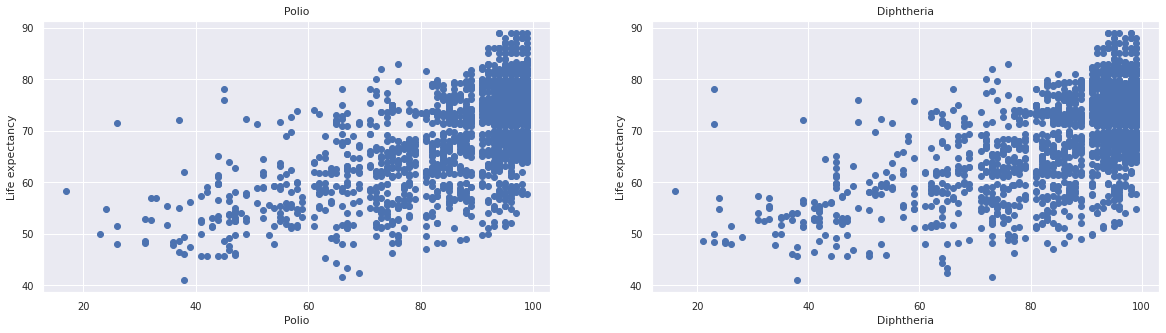

In [52]:
# create list with our next highest-correlating variables and set our target to Life expectancy

features = ['Polio', 'Diphtheria']
target = df_out['Life expectancy']

# plot the data

plt.figure(figsize=(20, 5))
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df_out[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Life expectancy')

In [53]:
"""
Here we see a weaker correlation, but they are both positive and very similar. More vaccinated people means a lower chance of dying from Polio and Diphtheria, which could result in a longer 
life expectancy for people in those countries. Let's try adding them to our other variables to see if we can get a better result.
"""

"\nHere we see a weaker correlation, but they are both positive and very similar. More vaccinated people means a lower chance of dying from Polio and Diphtheria, which could result in a longer \nlife expectancy for people in those countries. Let's try adding them to our other variables to see if we can get a better result.\n"

In [54]:
# multilinear regression with the addition of the above properties
# create new dataframe with our variables and set var Y to our target

X = pd.DataFrame(np.c_[df_out['Income composition of resources'], df_out['Schooling'], df_out['Polio'], df_out['Diphtheria']], columns = ['Income composition of resources','Schooling', 'Polio', 'Diphtheria'])
Y = df_out['Life expectancy']

# sampling our data; create train and test sets for both our target and our feature variables

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

# create our multilinear regression model

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

# evaluation and results of our model's training set and display

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

(1748, 4)
(438, 4)
(1748,)
(438,)
The model performance for training set
--------------------------------------
RMSE is 4.231332106469048
R2 score is 0.7650931124943039


The model performance for testing set
--------------------------------------
RMSE is 4.0731327370775094
R2 score is 0.7526423583607319


In [55]:
"""
Our results were a little better for our R2 value with the addition of 2 more variables.
"""

'\nOur results were a little better for our R2 value with the addition of 2 more variables.\n'

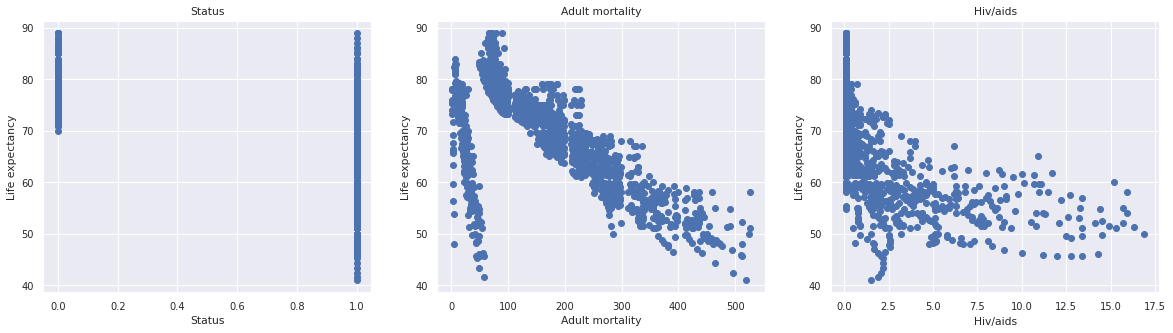

In [56]:
# create list with our next highest-correlating variables and set our target to Life expectancy

features = ['Status', 'Adult mortality','Hiv/aids']
target = df_out['Life expectancy']

# plot the data

plt.figure(figsize=(20, 5))
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df_out[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Life expectancy')

In [57]:
# multilinear regression with the addition of the above properties
# create new dataframe with our variables and set var Y to our target

X = pd.DataFrame(np.c_[df_out['Income composition of resources'], df_out['Schooling'], df_out['Polio'], df_out['Diphtheria'],df_out['Status'], df_out['Adult mortality'],df_out['Hiv/aids']], columns = ['Income composition of resources','Schooling', 'Polio', 'Diphtheria','Status','Adult mortality','Hiv/aids'])
Y = df_out['Life expectancy']

# sampling our data; create train and test sets for both our target and our feature variables

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

# create our multilinear regression model

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

# evaluation and results of our model's training set and display

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

(1748, 7)
(438, 7)
(1748,)
(438,)
The model performance for training set
--------------------------------------
RMSE is 3.4840904109319295
R2 score is 0.840734996157389


The model performance for testing set
--------------------------------------
RMSE is 3.229865625117591
R2 score is 0.844461783854976


In [58]:
#fig = plt.figure(figsize=(12,8))
#fig = sm.graphics.plot_regress_exog(model, 'assists', fig=fig)
df_out.columns

Index(['Year', 'Status', 'Life expectancy', 'Adult mortality', 'Infant deaths',
       'Alcohol', 'Percentage expenditure', 'Hepatitis b', 'Measles',
       'Under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'Hiv/aids', 'Gdp', 'Population', 'Thinness 10-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [59]:
import statsmodels.api as sm

X = df_out[['Schooling', 'Polio','Diphtheria','Status','Adult mortality','Hiv/aids', 'Income composition of resources']]
y = df_out['Life expectancy']
X = sm.add_constant(X)
model_fit = sm.OLS(y, X).fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life expectancy   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     1653.
Date:                Tue, 26 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:33:24   Log-Likelihood:                -5798.2
No. Observations:                2186   AIC:                         1.161e+04
Df Residuals:                    2178   BIC:                         1.166e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              47.2926      0.714     66.190      0.000      45.891      48.694
Schooling                          -0.1746      0.066     -2.655      0.008      -0.304      -0.046
Polio                               0.0196      0.020      0.964      0.335      -0.020       0.060
Diphtheria                          0.0752      0.020      3.851      0.000       0.037       0.114
Status                             -1.6760      0.222     -7.560      0.000      -2.111      -1.241
Adult mortality                    -0.0167      0.001    -19.040      0.000      -0.018      -0.015
Hiv/aids                           -0.7311      0.038    -19.078      0.000      -0.806      -0.656
Income composition of resources    32.2327      1.381     23.345      0.000      29.525      34.940
==============================================================================
Omnibus:                      117.549   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              410.960
Skew:                          -0.138   Prob(JB):                     5.77e-90
Kurtosis:                       5.106   Cond. No.                     4.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
'''
Given these predictor variables as the independent variables: Schooling, Polio, Diphtheria, Status, Adult mortality, Hiv/aids,
Income composition of resources. Through this model, we achieved our highest R-Squared yet (84.2%). We can also see that all variables except for polio
are statistically significant at the 5% level.

'''

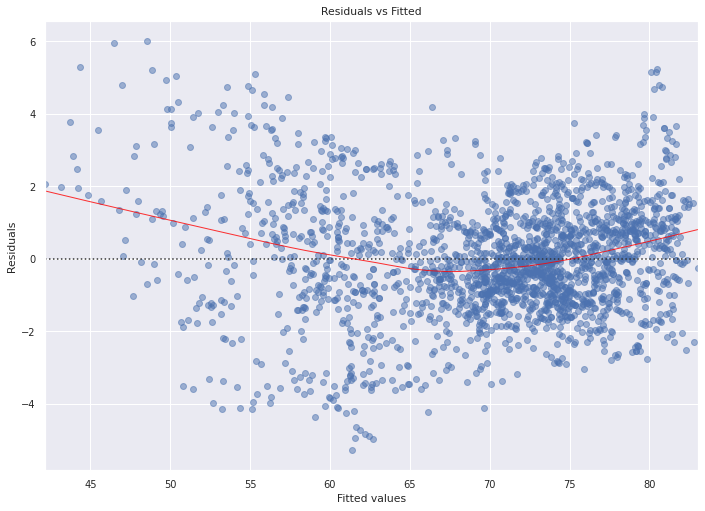

In [60]:
import seaborn as sns

# model values
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid
# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, df_out.columns[-1], data=df_out,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

In [ ]:
'''
Through the residual vs fitted plot above, we can see a little bit of curvature. However, the best fit line is mostly centered around 0. Therefore,
there seems to be no obvious concerns with linearity from the model.

'''

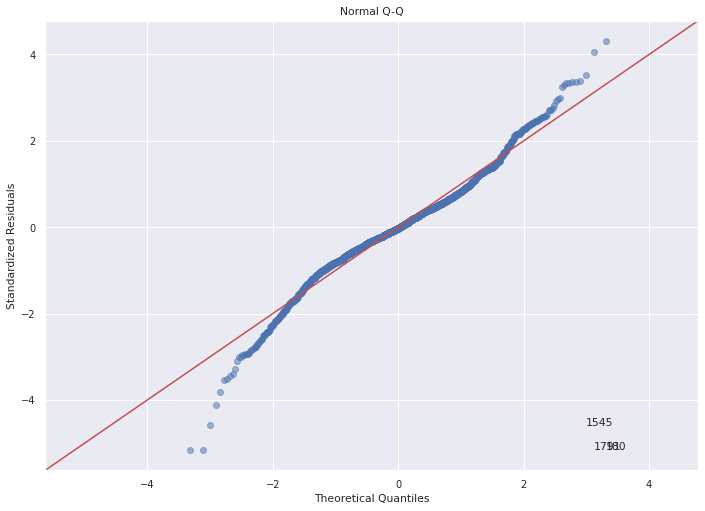

In [61]:
from statsmodels.graphics.gofplots import ProbPlot
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

In [ ]:
'''
Through the normal quantile plot above, we can see the tail is off of the zero-line a little bit towards the bottom and a little bit at the top. However,
for the most part, the standardized residuals seem to stay around the zero-line. Overall, the plot seems to be fairly reasonable and there seems to be no
obvious concerns with normal distribution for our model.

'''

In [70]:
# multilinear regression with the addition of the above properties
# create new dataframe with our variables and set var Y to our target

X = pd.DataFrame(np.c_[df_out['Income composition of resources'], df_out['Schooling'], df_out['Polio'], df_out['Diphtheria'],df_out['Status'], df_out['Adult mortality'],df_out['Hiv/aids']], columns = ['Income composition of resources','Schooling', 'Polio', 'Diphtheria','Status','Adult mortality','Hiv/aids'])
Y = df_out['Life expectancy']

# sampling our data; create train and test sets for both our target and our feature variables

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

# create our multilinear regression model
from sklearn.ensemble import RandomForestRegressor 
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train,Y_train)


#lin_model = LinearRegression()
#lin_model.fit(X_train, Y_train)

# evaluation and results of our model's training set and display

y_train_predict = forest_reg.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = forest_reg.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

(1748, 7)
(438, 7)
(1748,)
(438,)
The model performance for training set
--------------------------------------
RMSE is 0.7819479221810958
R2 score is 0.9918044152536623


The model performance for testing set
--------------------------------------
RMSE is 1.9936743753207098
R2 score is 0.945881489475846


In [ ]:
'''
The tree regression gave is an R^2 value of .943. This is higher than our R^2 value of .844 given by our multiple linear regression model. This model will be 
more accurate at making predictions than out multiple linear regression model.
'''